# Quantum Teleportation
Quantum teleportation is a phenomenon in quantum physics that allows the transfer of quantum information from one location to another, without the physical transfer of matter or energy. Note that this does not break any laws of physics and can be only used to teleport a quantum state, not a quantum particle. The algorithm uses entanglement to teleport an unknown quantum state.
    
We already saw that as a consequence of No Cloning theorem, which states that we can not clone any arbitrary state. We also understood that this is due to the fact that the act of measurement alters the quantum state being measured, and we will be only able to clone the states that are basis states of our system. Since we can not clone a quantum state, by extension, we can not clone quantum information.

### Making a 'Quantum Circuit'
First, we import the qiskit library. 'from qiskit import \*' imports all the components from the qiskit library. Alternatively you can also import only the components that you will be using to save resources, but this method is more reliable for beginners.<br>
Next we use 'QuantumCircuit(m, n)' to make ourselves a quantum circuit. m is the number of qubits and n is the number of classical bits. This initialises a quantum circuit with given number of classical bits and qubits. All the qubits are in state |0><br>
next we print the circuit to see our quantum circuit of 3 qubits. Notice the order of qubits, the least significant bit is at top and the most significant bit is at bottom. 

In [1]:
from qiskit import *
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
qc_teleportation = QuantumCircuit(3,3)

qc_teleportation.draw()


q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

### Adding gates and performing operations
Next, let us add some gates to the circuit. we will apply a X gate on q_0, a H gate (Hadamard gate) on q_1.

In [2]:
qc_teleportation.x(0)
qc_teleportation.h(1)
qc_teleportation.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────
          
c: 3/═════

Now let us add a CNOT gate where q_1 is the control qubit and not gate acts on q_2

In [3]:
qc_teleportation.cx(1,2)
qc_teleportation.draw()

┌───┐     
q_0: ┤ X ├─────
     ├───┤     
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

Now that you have learnt how to add gates to the circuit, let us see how to measure the qubits and write their data onto classical bits on the circuit.<br>
We measure q_0 to c_0, q_1 to c_1 and q_3 to c_3.

In [4]:
qc_teleportation.measure(0,0)
qc_teleportation.draw()

┌───┐     ┌─┐
q_0: ┤ X ├─────┤M├
     ├───┤     └╥┘
q_1: ┤ H ├──■───╫─
     └───┘┌─┴─┐ ║ 
q_2: ─────┤ X ├─╫─
          └───┘ ║ 
c: 3/═══════════╩═
                0

In [5]:
qc_teleportation.measure(1,1)
qc_teleportation.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├─────┤M├───
     ├───┤     └╥┘┌─┐
q_1: ┤ H ├──■───╫─┤M├
     └───┘┌─┴─┐ ║ └╥┘
q_2: ─────┤ X ├─╫──╫─
          └───┘ ║  ║ 
c: 3/═══════════╩══╩═
                0  1

In [6]:
qc_teleportation.measure(2,2)
qc_teleportation.draw()

┌───┐     ┌─┐      
q_0: ┤ X ├─────┤M├──────
     ├───┤     └╥┘┌─┐   
q_1: ┤ H ├──■───╫─┤M├───
     └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2

Now that we have added measurement gates, and each measured value is stored in a classical bit, let us try to predict the output of the circuit without running the circuit. To do that let us analyse the circuit by hand in the following way:
<!---some latex to make things look pretty, you dont have to worry about this-->
$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\renewcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$X\ket{0}  H\ket{0}  \ket{0}
$$=\ket{1} \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})  \ket{0}
Now, applying cnot gate,
$$\ket{1} \frac{1}{\sqrt{2}}(\ket{0}\ket{0}+\ket{1}\ket{1})$$
Combining this, we can write it as,
$$\ket{1} \frac{1}{\sqrt{2}}(\ket{00}+\ket{11})
$$ =\frac{1}{\sqrt{2}}(\ket{100}+\ket{111})

Now we have expected outputs to be states $\ket{100}$ and $\ket{111}$ here if we see the first state, it contains the bitstring $100$ where the value of q_0 written onto the least significant classical bit c_0 is written on the leftmost position. This is a standard practice where the least significant qubit is written from left and significance increases from left to right. But, qiskit writes it in reverse, the least significant bit is written in the rightmost position, so because of this, the bitstring obtained by qiskit will be reverse of what we have obtained. That is, the results obtained by Qiskit will be, $001$ and $111$.

## Simulating the Quantum Circuit
Now that we know what result to expect, let us see if we get the same result. To do this we have to run the quantum circuit large number of times and see the if we get the results as predicted, that is to get both the results, roughly the same number of times.<br><br>
To do this, we will use Qiskit's Aer Simulators. We will be using qasm_simulator from the Aer module as our backend, and that is shown in the first line of the code below.<br><br>
Now that we have selected our simulator, let us tell it to execute the circuit using execute() the arguments that this function takes are (name_of_circuit,backend,no_of_shots) where number of shots is the number of times you want to run this circuit. Then the result of this execution job is stored in a variable named result. This is done in the second line of the code.<br><br>
then we plot the results in a histogram to visualise the result. This is done in the third line of the code below.

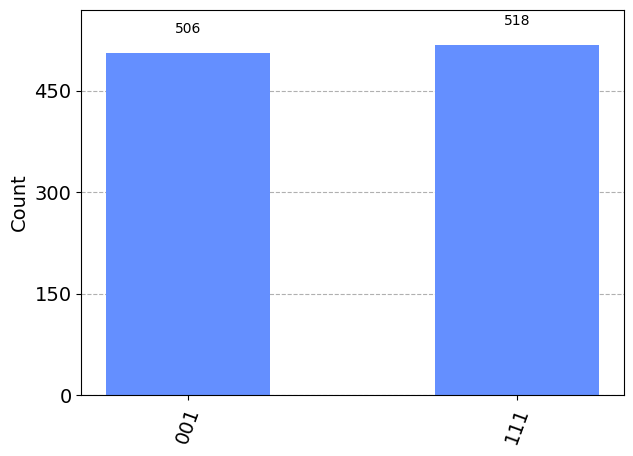

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc_teleportation,backend = simulator,shots = 1024).result()
plot_histogram(result.get_counts(qc_teleportation))

We can see that the results that we got from the simulation are as expected from theory. We got both the states roughly the same number of times, telling us that they have equal probablity of occurance if the experiment is performed randomly.

In [8]:
init_state = QuantumCircuit(1,1)
init_state.rx(np.pi/6,0)
init_state.ry(np.pi/3,0)
init_state.measure(0,0)
init_state.draw()

┌─────────┐┌─────────┐┌─┐
  q: ┤ Rx(π/6) ├┤ Ry(π/3) ├┤M├
     └─────────┘└─────────┘└╥┘
c: 1/═══════════════════════╩═
                            0

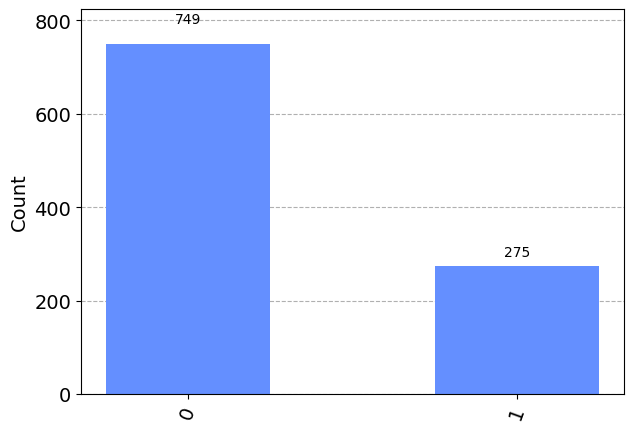

In [9]:
simulators = Aer.get_backend('qasm_simulator')
result = execute(init_state,backend = simulators,shots = 1024).result()
plot_histogram(result.get_counts(init_state))

## Assignment:
Now that you know how to make a quantum circuit, you have to create a circuit for quantum teleportation. The circuit has been discussed in class and slides are available on classroom, you can use them and these resources to make a circuit for quantum teleportation. Submission will be on classroom, you have to submit a jupyter notebook with the code.

### Problem:
You are given a quantum state at qubit  q_0, you have to use the teleportation algorithm to teleport it to some other qubit.

### Tasks:
<list>
    <li>edit the code below to make the quantum circuit have appropriate number of qubits and draw the circuit</li> 
    <li>Modify the circuit to create bell states on appropriate qubits and draw the circuit </li>
    <li>Further modify the circuit to measure appropriate qubits in bell bases</li>
    <li>Add the requred controlled gates or measurements to teleport the state </li>
    <li>Measure the teleported state 1024 times using qasm_simulator and plot the histogram</li>
 </list><br>
 If you have implemented the algortithm properly, you will see that the histogram that you obtain will be similar to the one we have obtained above
 
 ### Resources:
 <a href="https://www.geeksforgeeks.org/how-to-use-jupyter-notebook-an-ultimate-guide/"> Jupyter Notebook </a><br>
 <a href="https://www.qmunity.tech/tutorials/quantum-teleportation"> More on Quantum Teleportation </a><br>

 
 ### Submission
 Submitting the same jupyter notebook, or a different notebook is up to you to decide. But the state that is teleported has to be same as the given state.

In [14]:
#edit the code below to make a teleportation circuit. 
qc = QuantumCircuit(1,0)
qc.rx(np.pi/6,0)
qc.ry(np.pi/3,0)
qc.draw()

┌─────────┐┌─────────┐
q: ┤ Rx(π/6) ├┤ Ry(π/3) ├
   └─────────┘└─────────┘